In [13]:
import logging
import math
import os

import pandas as pd
from matplotlib import pyplot as plt

from data.data_preparer import DataPreparer
from data.data_reader import DataReader
from tools.restaurant_profiles_manager import RestaurantProfilesManager
from tools.user_profiles_manager import UserProfilesManager

logging.basicConfig(level=logging.INFO)

while str(os.getcwd())[-3:] != 'src':  # Execute from src-directory root
    os.chdir('..')

In [2]:
(b_train, r_train, u_train), (b_test, r_test, u_test) = DataReader().read_data()

user_profiles = UserProfilesManager().get_best()
business_profiles = RestaurantProfilesManager().get_best()

_, test_output = DataPreparer.transform_data(b_test, r_test, u_test, user_profiles, business_profiles)

INFO:root:Splitting in generation and prediction sets                                      
INFO:root:Creating User Profile
INFO:root:Finished reading in data, starting NLP...
INFO:root:Loading in all scores...
INFO:root:Merging Reviews...
INFO:root:Loading in NLP model...
INFO:root:Calculating bert_scores...


Pandas Apply:   0%|          | 0/475422 [00:00<?, ?it/s]

INFO:root:creating user profiles from bert_scores...
INFO:root:Exploding bert_scores (late) & normalizing user profiles...


Dask Apply:   0%|          | 0/32 [00:00<?, ?it/s]

INFO:root:Saving user profiles...
INFO:root:Saved user profiles with name: profile_tmp.parquet
INFO:root:Creating Restaurant Profile
INFO:root:Finished reading in data, starting NLP...
INFO:root:Loading in all scores...
INFO:root:Merging Reviews...
INFO:root:Loading in NLP model...
INFO:root:Calculating bert_scores...


Pandas Apply:   0%|          | 0/475422 [00:00<?, ?it/s]

INFO:root:creating user profiles from bert_scores...
INFO:root:Exploding bert_scores...
INFO:root:Saving business profiles...
INFO:root:Saved business profiles with name: profile_tmp.parquet
INFO:root:Transforming to ML input


In [28]:
predictions = pd.Series([4 for _ in range(len(test_output))]).rename("predicted")  # Always predict 4
actual = test_output.transform(lambda x: int(x * 4) + 1).rename("actual")
difference = abs(predictions - actual).rename("difference")

mse = (predictions.transform(lambda x: (x - 1) / 4) - test_output).transform(lambda x: x * x).mean()
print(f"MSE: {mse}")
print(f"adjusted RMSE: {math.sqrt(mse) * 4}")
results = pd.concat([predictions, actual, difference], axis=1)
results

MSE: 0.09524310872894334
adjusted RMSE: 1.2344592904033302


,predicted,actual,difference
0,4,5,1
1,4,4,0
2,4,4,0
3,4,5,1
4,4,4,0
...,...,...,...
26115,4,1,3
26116,4,4,0
26117,4,4,0
26118,4,5,1


(array([ 8113., 13918.,  2183.,  1906.,     0.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

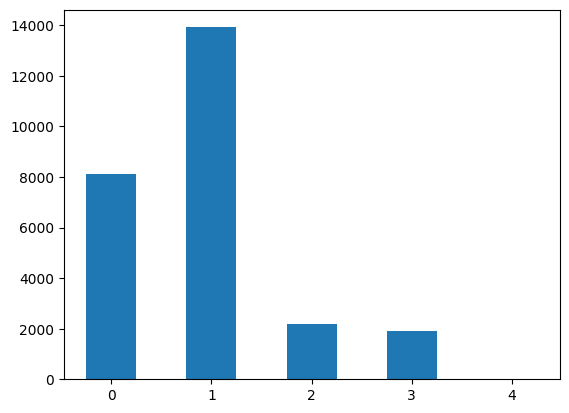

In [10]:
plt.hist(results['difference'], bins=[0, 1, 2, 3, 4, 5], align='left', rwidth=0.5)